In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
df = df.drop(columns = ['id'], axis = 1)
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5104 entries, 0 to 5103
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5104 non-null   object 
 1   age                5104 non-null   float64
 2   hypertension       5104 non-null   int64  
 3   heart_disease      5104 non-null   int64  
 4   ever_married       5104 non-null   object 
 5   work_type          5104 non-null   object 
 6   Residence_type     5104 non-null   object 
 7   avg_glucose_level  5104 non-null   float64
 8   bmi                4903 non-null   float64
 9   smoking_status     5104 non-null   object 
 10  stroke             5104 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 438.8+ KB


In [6]:
from sklearn.impute import SimpleImputer
df['bmi'] = SimpleImputer(strategy = 'mean').fit_transform(df[['bmi']])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.891862,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5099,Female,13.0,0,0,No,children,Rural,103.08,18.600000,Unknown,0
5100,Female,80.0,1,0,Yes,Private,Urban,83.75,28.891862,never smoked,0
5101,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5102,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.891862,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [9]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['stroke'], axis = 1)
y = df['stroke']


In [10]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7771, 10) (1943, 10) (7771,) (1943,)


In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [13]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    'n_estimators' : [10, 30, 50, 70, 85, 100],
    'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
    'criterion' : ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator = model, param_grid = params_grid, cv = 5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'criterion': 'gini', 'max_depth': 80, 'n_estimators': 100}


In [14]:
model = RandomForestClassifier(criterion = 'gini', max_depth = 80, n_estimators = 100)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=80)

In [15]:
print('Training accuarcy of Decision Tree: ', model.score(X_test, y_test) * 100)


Training accuarcy of Decision Tree:  94.49305198147195


In [18]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
testing_accuracy = ((cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])) * 100
print('Testing Accuracy: ', testing_accuracy)

[[893  70]
 [ 37 943]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       963
           1       0.93      0.96      0.95       980

    accuracy                           0.94      1943
   macro avg       0.95      0.94      0.94      1943
weighted avg       0.95      0.94      0.94      1943

Testing Accuracy:  94.49305198147195


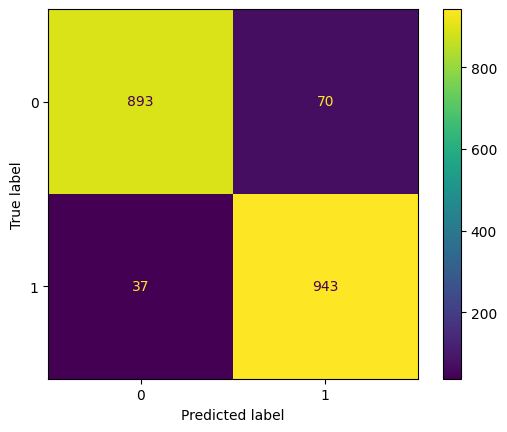

In [19]:
cf = ConfusionMatrixDisplay(confusion_matrix = cm)
cf.plot()